# Smooth Pulse

Let us implement a CZ gate on two atoms in the perfect Rydberg blockade regime, using smooth pulse ansatz functions for the phase and amplitude.

In [1]:
# %pip install -q --progress-bar off rydopt # Uncomment for installation on Colab

import rydopt as ro
import numpy as np
import matplotlib.pyplot as plt

First, we create the target gate.

In [2]:
gate = ro.gates.TwoQubitGate(phi=None, theta=np.pi, Vnn=float("inf"), decay=0.0)

Then we choose a pulse ansatz that consists of a constant detuning, a sweep of the laser phase, and a smooth switching of the Rabi frequency amplitude. We provide initial guesses of pulse paramaters as input for the optimization. For the Rabi frequency amplitude, we fixe the pulse parameters so that it plateaus at $1\;\Omega_0$ and 50 % of the pulse duration is used for switching. 

In [3]:
pulse_ansatz = ro.pulses.PulseAnsatz(
    detuning_ansatz=ro.pulses.const,
    phase_ansatz=ro.pulses.sin_crab,
    rabi_ansatz=ro.pulses.softbox_seventh_order_smoothstep,
)

initial_params = (12.0, [0.0], [0.0, 0.0], [1.0, 0.5])
fixed_initial_params = (False, [False], [False, False], [True, True])

Now, we perform the optimization and plot the result.


Started optimization using 1 process



proc00:   0%|                                                                                                 …


=== Optimization finished using Adam ===

Duration: 3.838 seconds
Gates with infidelity below tol=1.0e-07: 1

Optimized gate:
> infidelity <= tol
> parameters = (10.551257303347745, [-0.28121562], [0.42764051 1.24775025], [1.  0.5])
> duration = 10.551257303347745


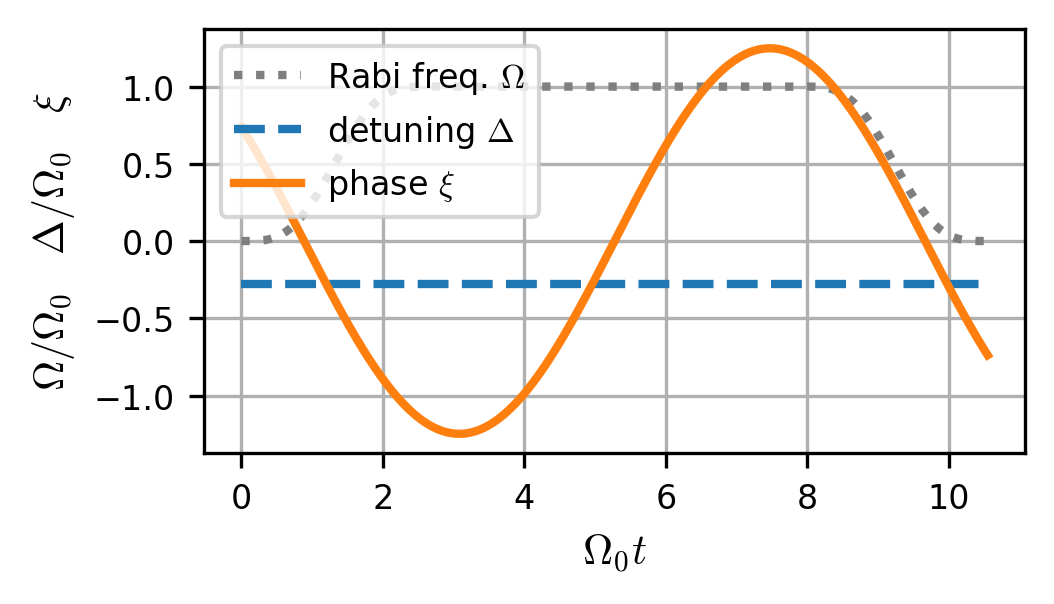

In [4]:
opt_result = ro.optimization.optimize(
    gate, pulse_ansatz, initial_params, fixed_initial_params
)
optimized_params = opt_result.params

ro.characterization.plot_pulse(pulse_ansatz, optimized_params)

In the code, we used a soft-box pulse ansatz with 7th-order-smoothstep-shaped edges. For other examples of soft-box pulse ansatze and their spectra, see below.

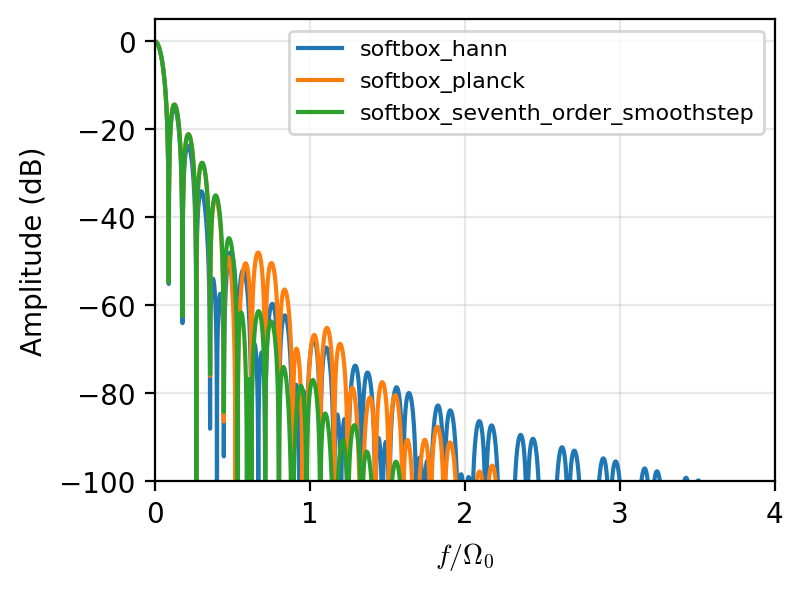

In [6]:
ansatze = [
    ro.pulses.PulseAnsatz(rabi_ansatz=ro.pulses.softbox_hann),
    ro.pulses.PulseAnsatz(rabi_ansatz=ro.pulses.softbox_planck),
    ro.pulses.PulseAnsatz(rabi_ansatz=ro.pulses.softbox_seventh_order_smoothstep),
]
labels = ["softbox_hann", "softbox_planck", "softbox_seventh_order_smoothstep"]

fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

for ansatz in ansatze:
    params = (15.0, [], [], [1.0, 0.5])
    ro.characterization.plot_spectrum(ansatz, params, ax=ax)

for line, label in zip(ax.get_lines(), labels):
    line.set_label(label)

ax.legend(fontsize=8)
ax.set_xlim(0, 4)
ax.set_ylim(-100, 5)
ax.set_xlabel(r"$f / \Omega_0$")
ax.set_ylabel("Amplitude (dB)")
ax.grid(alpha=0.3)